# Lego Sets Data From 1949 - 2020

By Dominic Graziano

Explanation of data - 

Name = original set name \
Theme = designated theme of the set \
Minifigs = number of minifigures contained in the set \
Subtheme = subtheme within the theme \
Desc = written description of the set \
Prices = MSRP price of the set, contains dollars, pounds or euros \
Pieces = number of pieces contained in the set \
Year = year the set was listed as being introduced

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

Some of the things I wanted to showcase with this data are:
* the price discrepancies between the themes (licensed themes such as Star Wars, Marvel, DC, compared to lego original themes)
* see the price per piece breakdown throughout the history of lego
* breakdown the number of sets and themes produced per year


In [2]:
df = pd.read_csv('lego.csv')
df.head()

,Unnamed: 0,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year
0,0,700-12,System,NaN,Basic Set,700-12: Automatic Binding Bricks,NaN,NaN,1949
1,1,700_1_1-1,System,NaN,Supplemental,700_1_1-1: Individual 2 x 4 Bricks,NaN,NaN,1950
2,2,700_1_2-1,System,NaN,Supplemental,700_1_2-1: Individual 2 x 2 Bricks,NaN,NaN,1950
3,3,700_A-1,System,NaN,Basic Set,700_A-1: Automatic Binding Bricks Small Brick ...,NaN,NaN,1950
4,4,700_B_1-1,System,NaN,Supplemental,700_B_1-1: Individual 1 x 4 x 2 Window (withou...,NaN,NaN,1950


In [3]:
df = df.drop(columns = ["Unnamed: 0"])


In [65]:
df['Theme'].nunique()

124

In [4]:
df['Theme'].unique()

array(['System', 'Promotional', 'Dacta', 'Samsonite', 'Trains', 'Books',
       'Universal Building Set', 'Legoland', 'Duplo', 'Minitalia',
       'LEGOLAND', 'Homemaker', 'Gear', 'Basic',
       'Building Set with People', 'PreSchool', 'Hobby Set', 'Technic',
       'Service Packs', 'Town', 'Castle', 'Space', 'Fabuland', 'Scala',
       'Boats', 'Model Team', 'Assorted', 'Pirates', 'Belville',
       'Creator', 'Freestyle', 'Primo', 'Aquazone', 'Time Cruisers',
       'Western', 'Classic', 'Adventurers', 'Znap', 'Racers',
       'Mindstorms', 'Education', 'Seasonal', 'Rock Raiders', 'Star Wars',
       'Studios', 'Baby', 'Action Wheelers', 'Sports', 'Bulk Bricks',
       'Creator Expert', 'Mickey Mouse', 'Bionicle', 'Jack Stone',
       'Harry Potter', 'Dinosaurs', 'Alpha Team', 'Explore', 'Spybotics',
       'Galidor', 'Miscellaneous', 'Island Xtreme Stunts', 'Clikits',
       'World City', '4 Juniors', 'Spider-Man', 'Discovery', 'Quatro',
       'Make and Create', 'City', 'Factory',

I wanted to filter out and only get the sets that are based on the dollar

In [5]:
df = df[df['Prices'].str.contains('€') == False]

Get rid of the  $ and | which won't allow us to convert the string to a float 

In [6]:
df['Prices'] = df['Prices'].str.replace('\$','')
df['Prices'] = df['Prices'].str.replace('\|','')
 
df['Prices'] = df['Prices'].astype(float)


/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_12617/1905844088.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\$','')
/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_12617/1905844088.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\|','')


In [7]:
df['Price_Per_Piece'] = df['Prices'] / df['Pieces']
df.head()

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
179,215-3,Samsonite,NaN,Supplemental,215-3: 2 X 8 Bricks,0.5,9.0,1961,0.055556
181,217-3,Samsonite,NaN,Supplemental,217-3: 4 x 4 Corner Bricks,0.5,10.0,1961,0.050000
182,218-3,Samsonite,NaN,Supplemental,218-3: 2 x 4 Bricks,0.5,20.0,1961,0.025000
183,219-2,Samsonite,NaN,Supplemental,219-2: 2 X 3 Bricks,0.5,24.0,1961,0.020833
184,220-2,Samsonite,NaN,Supplemental,220-2: 2 X 2 Bricks,0.5,33.0,1961,0.015152


in future use this code to write a loop through all years and plot

In [8]:
df[df['Year']== 2008]['Theme'].nunique()

23

In [9]:
sort_p = df.sort_values(by = 'Prices' ,ascending= False)
sort_p = sort_p[:50]
sort_p['Theme'].value_counts()

Star Wars           9
Education           8
Technic             7
Creator Expert      6
Mindstorms          6
Gear                5
Dacta               2
Trains              2
Architecture        1
Studios             1
Monster Fighters    1
City                1
Space               1
Name: Theme, dtype: int64

In [10]:
df.sort_values(by = 'Price_Per_Piece', ascending= False)

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
3754,8299-1,Technic,1.0,NaN,8299-1: Search Sub,50.00,0.0,1997,inf
8552,10287-1,Mindstorms,NaN,NXT,10287-1: Intelligent NXT Brick (Black),169.99,1.0,2009,169.99
4480,9709-1,Mindstorms,NaN,1.0,9709-1: RCX Programmable LEGO Brick,110.00,1.0,1999,110.00
4869,9917-1,Education,NaN,Mindstorms,9917-1: DCP Sensor Connector Cable,59.00,1.0,2000,59.00
9601,10286-1,Mindstorms,NaN,NXT,10286-1: Colour Sensor,54.99,1.0,2011,54.99
...,...,...,...,...,...,...,...,...,...
16683,5005893-1,Gear,NaN,Housewares,5005893-1: White Black and Gray Wall Hanger Set,9.99,NaN,2020,NaN
16684,5005894-1,Gear,NaN,Housewares,5005894-1: Pink Light Blue and White Wall Hang...,9.99,NaN,2020,NaN
16685,5005963-1,Gear,NaN,Stationery,5005963-1: 12 Pack Marker Set,19.99,NaN,2020,NaN
16690,5006035-1,Gear,NaN,Miscellaneous,5006035-1: Holiday Bag Tag Stormtrooper,5.99,NaN,2020,NaN


In [11]:
year_df = df.groupby('Year')


In [12]:
year_theme_df = df.groupby('Year')['Theme'].nunique()

Text(0.5, 1.0, 'Lego Themes Over Time')

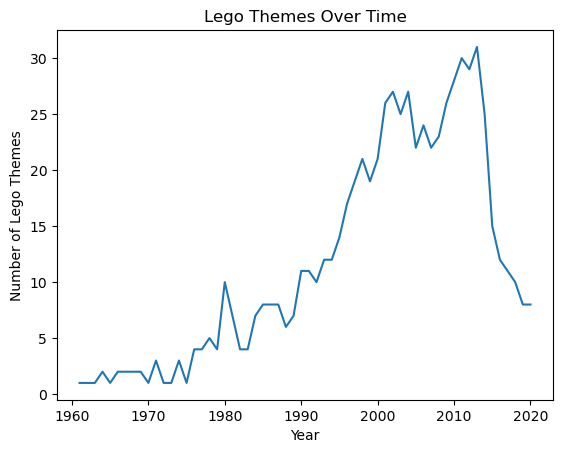

In [66]:
year_theme_df.plot()
plt.ylabel('Number of Lego Themes')
plt.title('Lego Themes Over Time')

In [20]:
sw_df = df[df['Theme'] == 'Star Wars']
sw_df.tail()

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
12698,5002948-1,Star Wars,1.0,The Force Awakens,5002948-1: C-3PO,3.99,3.0,2015,1.330000
13782,30496-1,Star Wars,NaN,Rogue One,30496-1: U-Wing Fighter,3.99,55.0,2017,0.072545
14461,CELEB2017-1,Star Wars,2.0,Promotional,CELEB2017-1: Detention Block Rescue,39.99,220.0,2017,0.181773
14518,SWMF-1,Star Wars,NaN,Promotional,SWMF-1: Millennium Falcon,4.99,20.0,2017,0.249500
15718,75227-1,Star Wars,NaN,Promotional,75227-1: Darth Vader Bust,39.99,327.0,2019,0.122294


In [15]:
table = pd.pivot_table(sw_df, index = ['Subtheme'], aggfunc = {'Minifigs':'sum', 'Prices':'median', 'Price_Per_Piece':'mean', 'Name':'count'},fill_value= 0)
table

,Minifigs,Name,Price_Per_Piece,Prices
Subtheme,,,,
Episode I,120,30,0.121095,24.995
Episode II,55,15,0.110221,30.000
Episode III,90,28,0.114860,27.490
Episode IV,97,26,0.118960,39.990
Episode V,96,21,0.118114,49.990
Episode VI,112,28,0.130810,22.490
Gear,0,1,0.000000,69.990
Legends,22,8,0.122999,34.990
Microfighters,2,2,0.104074,9.990


In [16]:
table = pd.pivot_table(sw_df, index = ['Year'], aggfunc = {'Minifigs':'sum', 'Prices':'median', 'Price_Per_Piece':'mean', 'Name':'count'},fill_value= 0)
table

,Minifigs,Name,Price_Per_Piece,Prices
Year,,,,
1999,42,13,0.113038,20.00
2000,43,19,0.127841,20.00
2001,18,10,0.107324,35.00
2002,42,23,0.125267,30.00
2003,34,19,0.099559,7.00
2004,24,12,0.108748,25.00
2005,62,19,0.105226,30.00
2006,42,11,0.089700,49.99
2007,72,18,0.200709,49.99


In [17]:
sw_gb_df = sw_df.groupby('Year')['Price_Per_Piece'].mean()
sw_gb_df


Year
1999    0.113038
2000    0.127841
2001    0.107324
2002    0.125267
2003    0.099559
2004    0.108748
2005    0.105226
2006    0.089700
2007    0.200709
2008    0.112201
2009    2.639026
2010    0.153459
2011    0.127109
2012    0.136791
2013    0.128559
2014    0.104285
2015    0.713659
2017    0.167939
2019    0.122294
Name: Price_Per_Piece, dtype: float64

Text(0.5, 1.0, 'Lego Star Wars Price Per Piece Over Time')

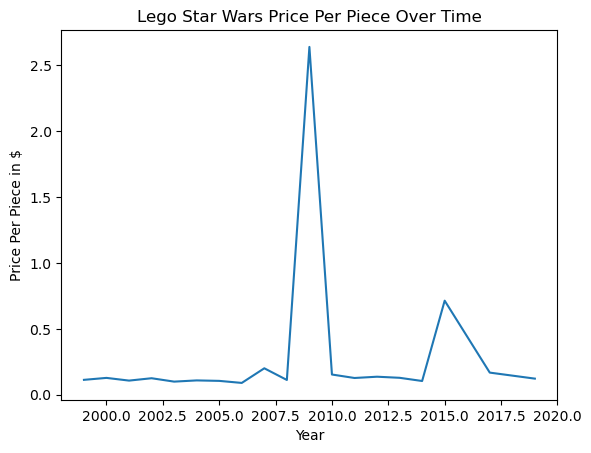

In [67]:
sw_gb_df.plot()
plt.ylabel('Price Per Piece in $')
plt.title('Lego Star Wars Price Per Piece Over Time')


In [19]:
a = sw_df.sort_values(['Minifigs'],ascending= False)
sw = a[:15]
sw


,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
7527,7662-1,Star Wars,21.0,Episode I,7662-1: Trade Federation MTT,99.99,1330.0,2007,0.075180
8439,8038-1,Star Wars,12.0,Episode VI,8038-1: The Battle of Endor,99.99,890.0,2009,0.112348
9481,7929-1,Star Wars,12.0,Episode I,7929-1: The Battle of Naboo,24.99,241.0,2011,0.103693
6844,10144-1,Star Wars,11.0,Episode IV,10144-1: Sandcrawler,139.99,1669.0,2005,0.083877
10181,9509-1,Star Wars,10.0,Seasonal,9509-1: Star Wars Advent Calendar,49.99,234.0,2012,0.213632
6718,7264-1,Star Wars,10.0,Episode VI,7264-1: Imperial Inspection,50.00,367.0,2005,0.136240
4450,7171-1,Star Wars,10.0,Episode I,7171-1: Mos Espa Podrace,90.00,896.0,1999,0.100446
10183,9516-1,Star Wars,10.0,Episode VI,9516-1: Jabba's Palace,119.99,717.0,2012,0.167350
9486,7958-1,Star Wars,9.0,Seasonal,7958-1: Star Wars Advent Calendar,39.99,266.0,2011,0.150338
7038,6211-1,Star Wars,9.0,Episode IV,6211-1: Imperial Star Destroyer,99.99,1367.0,2006,0.073146


In [60]:
non_sw = df[df['Theme']!= 'Star Wars']
non_sw = non_sw.groupby('Year')['Prices'].mean()


In [61]:
sw = sw_df.groupby('Year')['Prices'].mean()

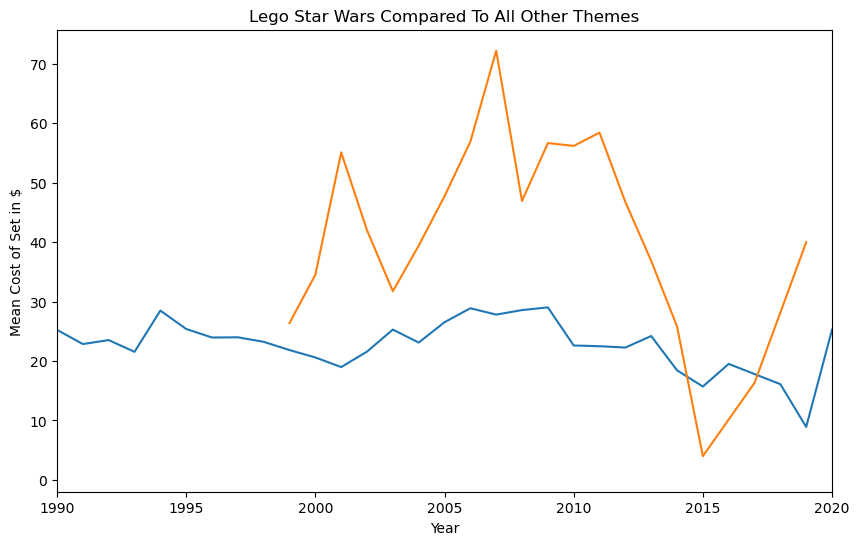

In [69]:
plt.figure(figsize = (10,6))
non_sw.plot()
sw.plot()

plt.xlim(1990,2020)
plt.ylabel('Mean Cost of Set in $')
plt.title('Lego Star Wars Compared To All Other Themes')
plt.show()